# Simulando un apocalipsis zombi

El objeto del ejercicio es crear una pequeña simulación paso a paso de la evolución de una epidemia zombi en una población mediante un modelo matemático.

En el modelo:

   * S es el número de humanos
   * Z es el número de zombis
   * R es el número de muertos
   * P es el ratio de nacimientos humanos
   * m es la probabilidad de muerte natural
   * B es la probabilidad de contraer el virus zombi
   * G es la probabilidad de que un muerto resucite como zombi
   * A es la probabilidad de que un zombi sea destruido definitivamente
   
Las ecuaciones que gobiernan las tasas de incremento de las poblaciones humana, zombi y de muertos son:

    dS/dt = P - B*S*Z - m*S
    dZ/dt = B*S*Z + G*R - A*S*Z
    dR/dt = m*S + A*S*Z - G*R


## Valores de los parámetros de la simulación

In [1]:
# Estos valores se pueden utilizar en las funciones 
# subsiguientes como si fueran constantes. No es 
# necesario pasarlos por parámetro.

P = 0      # Sistema cerrado sin nacimientos
m = 0.0001 # por día
B = 0.0095 # por día
G = 0.0001 # por día
A = 0.0001 # por día

#Introducimos la variable del tiempo
delta_t = 0.01

## Representación de un estado del sistema
Decide que estructura de datos vas a usar para representar un estado del sistema compuesto por un número de humanos, zombis y muertos. Escribe en la siguiente celda cual sería la representación de 500 humanos, 0 zombis y 0 muertos y llamalo **estado_inicial**.

In [2]:
#Establezco un etsado inicial
estado_Inicial = [500, 0, 0]

## Funciones de crecimiento de poblaciones
Codifica una función por cada una de las ecuaciones de incremento de población. Dale a la funciòn un nombre descriptivo y define para ella los argumentos/parámetros de entreda adecuados.

In [3]:
# Función que dado el estado del sistema nos devuelve 
# la tasa de crecimiento de los humanos (S) según la ecuación 
# correspondiente.
    #dS/dt = P - B*S*Z - m*S
def crecimiento_humanos(humanos, zombies, muertos):
    return P - B * humanos * zombies - m * humanos

In [4]:
# Función que dado el estado del sistema nos devuelve 
# la tasa de crecimiento de los zombies (Z) según la ecuación 
# correspondiente.
    #dZ/dt = B*S*Z + G*R - A*S*Z
def crecimiento_zombies(humanos, zombies, muertos):
    return B * humanos * zombies + G * muertos - A * humanos * zombies

In [5]:
# Función que dado el estado del sistema nos devuelve 
# la tasa de crecimiento de los muertos (R) según la ecuación 
# correspondiente.
    #dR/dt = m*S + A*S*Z - G*R
def crecimiento_muertos(humanos, zombies, muertos):
    return m * humanos + A * humanos * zombies - G * muertos

In [6]:
#test
s1= crecimiento_humanos(500,0,0)
z1= crecimiento_zombies(500,0,0)
r1= crecimiento_muertos(500,0,0)
print(s1, z1, r1)

-0.05 0.0 0.05


## Función de evolución del sistema
Debemos definir una función que dado un estado del sistema tal y como se definió 
nos devuelva el nuevo estado del sistema tras un tiempo **delta_t**. Para ello será necesario hacer uso de las funciones previamente definidas para las tasas de crecimiento poblacional.

In [7]:
# Función que dado un estado del sistema nos devuelve
# el nuevo estado tras un intervalo de tiempo **delta_t**. 
# OJO: la salida de la funcion debe ser del mismo tipo que 
# la entrada y corresponder en forma con estado_inicial.
def evolucion(humanos, zombies, muertos):
    estado = [humanos, zombies, muertos]
    
    #Variaciones en el perdiodo delta_t
    variacion_humanos = humanos + crecimiento_humanos(humanos, zombies, muertos)*delta_t
    variacion_zombies = zombies + crecimiento_zombies(humanos, zombies, muertos)*delta_t
    variacion_muertos = muertos + crecimiento_muertos(humanos, zombies, muertos)*delta_t
    
    #Añadimos los valores
    nuevo_estado = []
    nuevo_estado.insert(0, variacion_humanos)
    nuevo_estado.insert(1, variacion_zombies)
    nuevo_estado.insert(2, variacion_muertos)
    
    
    return nuevo_estado

In [8]:
#test
evolucion(500,0,0)

[499.9995, 0.0, 0.0005]

## Generación de series de datos
Con lo que tenemos hasta el momento debemos ser capaces de dado un estado inicial y un número de días generar puntos que representen la evolución del sistema. Para ello vamos a crear dos funciones.

### Evoluvionar un día
Nosotros debemos calcular la evolución del sistema en pequeños pasos de **delta_t** pero solo queremos dibujar los puntos día a día. Para simplificar esto crearemos una función que dado un **delta_t** (fráción de un dia) nos ejecute la simulación el número de veces necesarias para avanzar un día completo.

Por ejemplo, si **delta_t** es 0.1 (un décimo de día) será necesario ejecutar la simulación 10 pasos para un día completo.

La función recibirá un **estado_población** y un **delta_t** y nos devolverá el nuevo **estado_población**.

In [9]:
#estado_incial = [500,0,0]
#delta_t = 0.01
#1dia= 1/delta_t
#Mi caso: 1/0.01=100

def evolucion_dia(estado, delta_t):
    #Genero un contador con el numero de actualizaciones en un dia por delta_t
    contador = range (int(1/delta_t))
    humanos, zombies, muertos = estado
    
    #Guardo los valores del estado
    nuevos_humanos= humanos
    nuevos_zombies= zombies
    nuevos_muertos= muertos
    
    #Bucle para las veces que ocurre la actualizacion de delta_t en un dia
    for n in (contador):
        
        #Funcion evolucion
        nuevo_estado = evolucion(nuevos_humanos, nuevos_zombies, nuevos_muertos)
        
        #Guardo el nuevo valor de cada variable para aplicarle nuevamente la actualizacion
        nuevos_humanos = nuevo_estado[0]
        nuevos_zombies = nuevo_estado[1]
        nuevos_muertos = nuevo_estado[2]

    #Nueva poblacion diaria
    nuevo_estado_poblacion = []
    nuevo_estado_poblacion.append(nuevos_humanos)
    nuevo_estado_poblacion.append(nuevos_zombies)
    nuevo_estado_poblacion.append(nuevos_muertos)

    
    return nuevo_estado_poblacion

In [10]:
#test
estado_prueba = [500,0,0]
evolucion_dia(estado_prueba, delta_t)

[499.9499836885013, 2.1063822663552567e-05, 0.04999524767627673]

### Simular
La función **simular** parte de un estado inicial de la población y un número de días y ejecuta la simulación en pasos de un día. Cada nuevo estado del sistema es guardado en una lista y dicha lista devuelta como result

In [11]:
def simular(estado_actual_dia, numero_dias):
    #Datos de la poblacion actual 
    poblacion_actual = [(estado_actual_dia)]
    estado_actual = estado_actual_dia
    
    #Bucle por dia
    for n in range(numero_dias):
        #Funcion de las actualizaciones diarias
        actualizacion = evolucion_dia(estado_actual, delta_t)
        
        #Añado cada dia a la lista que quiero devolver
        poblacion_actual.append((actualizacion))
        
        #Le doy el nuevo valor para que el bucle empiece por el nuevo valor
        estado_actual = actualizacion
    
    return poblacion_actual

In [12]:
#test
simular(estado_Inicial, 5)

[[500, 0, 0],
 [499.9499836885013, 2.1063822663552567e-05, 0.04999524767627673],
 [499.89779231685856, 0.0022042841991211488, 0.1000033989421922],
 [499.6301009581281, 0.21763360153896194, 0.15226544033283182],
 [478.9635328831667, 20.61766802176533, 0.4187990950679785],
 [88.758682444174, 406.6833755412277, 4.557942014598184]]

# Ejecución de la simulación 
Introduce en la celda siguiente el código de llamada a la función **simular** que evoluciona desde el **estado_inicial** durante 30 días. LLama al resultado **treinta_dias**.

In [13]:
#Nueva funcion para 30 dias de apocalipsis
treinta_dias = simular(estado_Inicial, 30)

## Gráficas
Partiendo de la variable **treinta_dias** dibuja una gráfica que muestre simultáneamente la evolución en el tiempo de humanos, zombis y muertos.

Text(0,0.5,'Evolucion diaria')

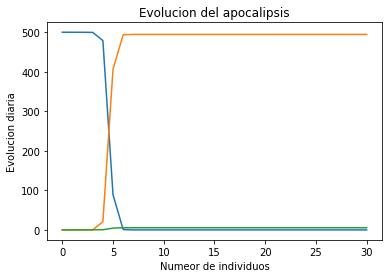

In [25]:
#Importamos pyplot del paquete matplotlib
from matplotlib import pyplot as plot

#Grafica para la funcion treinta_dias
plot.plot(treinta_dias)
#Introducir leyendas
plot.title('Evolucion del apocalipsis')
plot.xlabel('Numeor de individuos')
plot.ylabel('Evolucion diaria')

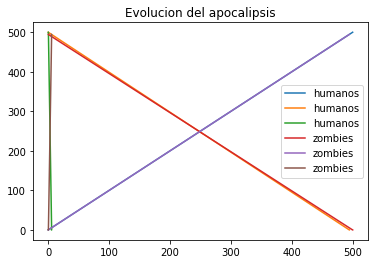

In [15]:
HUMANOS = list(map(lambda punto: punto[0], treinta_dias))
ZOMBIES = list(map(lambda punto: punto[1], treinta_dias))

#Intento de graficas con leyendas
#Grafica para la funcion treinta_dias
plot.plot(treinta_dias, HUMANOS, label='humanos')
plot.plot(treinta_dias, ZOMBIES, label='zombies')

#Introducir leyendas
plot.title('Evolucion del apocalipsis')
plot.legend()

Crea otra gráfica (scatter) que relacione el número de humanos con el número de zombies.

Text(0,0.5,'Evolucion diaria')

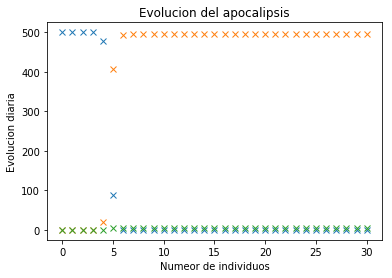

In [16]:
#Grafica scatter 
plot.plot(treinta_dias, 'x')
plot.title('Evolucion del apocalipsis')
plot.xlabel('Numeor de individuos')
plot.ylabel('Evolucion diaria')

## Ejecución con otros valores de población inicial
Ejecuta de nuevo simular con un estado inicial de 1000 humanos, 10 zombis, 0 muertos. Llama al resultado **con_zombis**

In [17]:
#Nuevo simulador
nuevo_estado_inicial = [1000, 10, 0]
con_zombies = simular(nuevo_estado_inicial, 30)

## Vuelve a crear la mismas gráficas para este nuevo caso

Text(0,0.5,'Evolucion diaria')

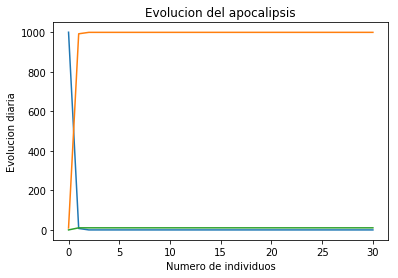

In [18]:
# Evolución temporal de humanos, zombis y muertos
plot.plot(con_zombies)
plot.title('Evolucion del apocalipsis')
plot.xlabel('Numero de individuos')
plot.ylabel('Evolucion diaria')

Text(0,0.5,'Num. Humanos')

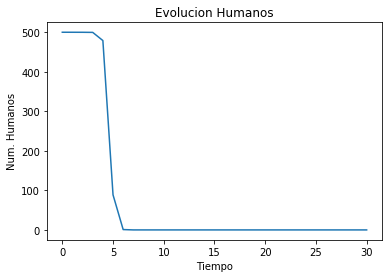

In [19]:
    # Humanos vs Zombis
#Genero una variable que guarde los valeros de humanos y otra para zombies
HUMANOS = list(map(lambda punto: punto[0], treinta_dias))
ZOMBIES = list(map(lambda punto: punto[1], treinta_dias))
#Grafica Humanos
plot.plot(HUMANOS)
plot.title('Evolucion Humanos')
plot.xlabel('Tiempo')
plot.ylabel('Num. Humanos')

Text(0,0.5,'Num. Zombies')

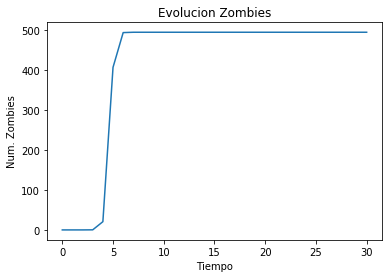

In [20]:
#Grafica Zombies
plot.plot(ZOMBIES)
plot.title('Evolucion Zombies')
plot.xlabel('Tiempo')
plot.ylabel('Num. Zombies')

## Ejecución con nacimientos
Introduce un valor de P que te parezca interesante y prueba a ejecutar la simulación. Llama al resultado **con_nacimientos**

In [21]:
#Establezco el parametro comparandorlo con la muerte natural
#Establezo que por cada 4 muertes naturales hay un nacimiento teniendo en cuenta que es mas dificil sobreviivir
#hasta dar a luz
P = 0.000025
nuevo_estado_inicial = [1000, 10, 0]
con_nacimientos = simular(nuevo_estado_inicial, 30)

## Vuelve a crear la mismas gráficas para este nuevo caso

Text(0,0.5,'Evolucion diaria')

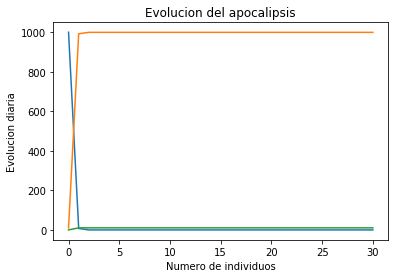

In [22]:
# Evolución temporal de humanos, zombis y muertos
plot.plot(con_nacimientos)
plot.title('Evolucion del apocalipsis')
plot.xlabel('Numero de individuos')
plot.ylabel('Evolucion diaria')

Text(0,0.5,'Num. HUMANOS')

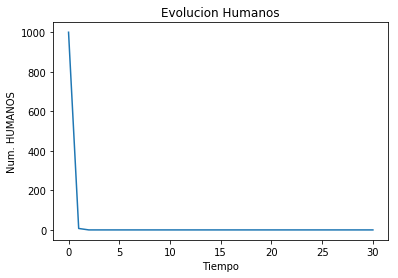

In [23]:
# Humanos vs Zombis
HUMANOS2 = list(map(lambda punto: punto[0], con_nacimientos))
ZOMBIES2 = list(map(lambda punto: punto[1], con_nacimientos))
#Grafica Humanos
plot.plot(HUMANOS2)
plot.title('Evolucion Humanos')
plot.xlabel('Tiempo')
plot.ylabel('Num. HUMANOS')

Text(0,0.5,'Num. Zombies')

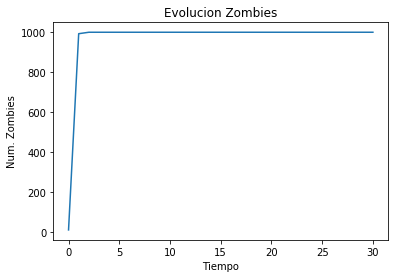

In [24]:
#Grafica Zombies
plot.plot(ZOMBIES2)
plot.title('Evolucion Zombies')
plot.xlabel('Tiempo')
plot.ylabel('Num. Zombies')